### Kirill Yakimenko

__Курсовая работа__

Версия 3:
- ф-ция логарифма к столбцам
- ф-ция процентов к столбцам

__Data Set Information:__

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

__Attribute Information:__

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
path = r'C:\Python\Ykill\DataScinese\data'
os.chdir(path)

In [3]:
df = pd.read_excel('default of credit card clients.xls', skiprows=1)
df = df.drop(columns='ID')

__общие параметры данных__

In [4]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 24)

In [7]:
df.isnull().values.any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [9]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


__корреляция__

In [4]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(25, 25))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show();

NameError: name 'df' is not defined

__default column__

In [11]:
pd.value_counts(df['default payment next month'], normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

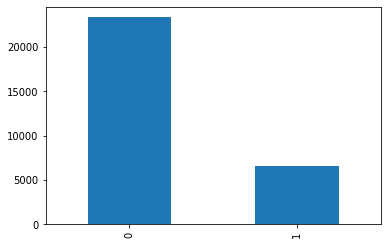

In [12]:
pd.value_counts(df['default payment next month']).plot.bar();

__подготовка данных__

In [13]:
y = df['default payment next month']
X_all = df.drop(columns='default payment next month')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=.2)

__классификатор__

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
y_pred = clf.predict(X_test)

__Feature importance__

In [18]:
clf.feature_importances_

array([0.05742735, 0.01190913, 0.02120389, 0.01514889, 0.07845202,
       0.16184168, 0.03516434, 0.01056433, 0.00736602, 0.01132157,
       0.01052794, 0.06352416, 0.04828648, 0.04510181, 0.04106022,
       0.04110407, 0.04245572, 0.04600687, 0.05349668, 0.05721118,
       0.03765602, 0.04847728, 0.05469234])

In [19]:
columns = X_test.columns
fi = pd.DataFrame(clf.feature_importances_, index=columns)\
.sort_values(by=0, ascending=False).reset_index()

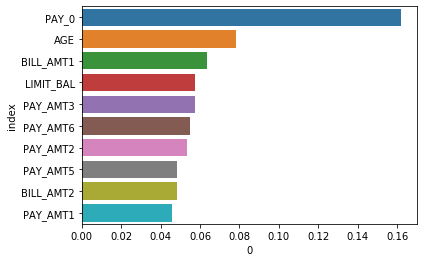

In [20]:
sns.barplot(x=0, y='index', data=fi.iloc[:10]);

__проверка__

In [21]:
from sklearn.metrics import (accuracy_score, roc_auc_score, roc_curve,
                             f1_score, precision_score, recall_score, 
                             confusion_matrix)

In [22]:
def metrics_clf(y_test, y_pred):
    print(f'accuracy = {accuracy_score(y_test, y_pred):.2f}')
    print(f'precision = {precision_score(y_test, y_pred):.2f}')
    print(f'recall = {recall_score(y_test, y_pred):.2f}')
    print(f'f1 = {f1_score(y_test, y_pred):.2f}')
    print(f'roc auc = {roc_auc_score(y_test, y_pred):.2f}')

In [23]:
metrics_clf(y_test, y_pred)

accuracy = 0.73
precision = 0.40
recall = 0.41
f1 = 0.40
roc auc = 0.62


In [24]:
confusion_matrix(y_test, y_pred)

array([[3842,  828],
       [ 785,  545]], dtype=int64)

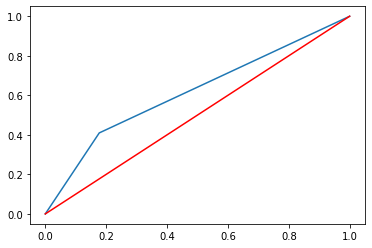

In [25]:
# calculate roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# make a plot
plt.plot(fpr, tpr);
plt.plot(np.linspace(0,1), np.linspace(0,1), color='red');

__фильтрация выбросов__

In [26]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return (modified_z_score > thresh).astype(int)

In [27]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

In [28]:
outliers_df = pd.DataFrame()
for c in X_all.columns:
    outliers_df[c] = percentile_based_outlier(X_all[c])

In [29]:
outliers_df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
outliers_df.sum(axis=1)

0        0
1        0
2        0
3        0
4        2
        ..
29995    0
29996    0
29997    2
29998    3
29999    0
Length: 30000, dtype: int64

In [31]:
outliers_df.sum(axis=1).describe()

count    30000.000000
mean         0.603500
std          1.286135
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         13.000000
dtype: float64

In [32]:
more_than = outliers_df.sum(axis=1).map(lambda x: x > 12)
amount = more_than.astype(int).sum(axis=0)

In [33]:
amount / len(X_all)

0.0001

In [34]:
df = pd.read_excel('default of credit card clients.xls', skiprows=1)
df = df.drop( columns='ID')
y = df['default payment next month']
filtered = y[~more_than]
filtered.value_counts(normalize=True)

0    0.778811
1    0.221189
Name: default payment next month, dtype: float64

In [35]:
df_filtered = df[~more_than]

In [36]:
# ф-ция графика распределения по столбцам
def plotbox(df):
    plt.figure(figsize=(10,8))
    ax = sns.boxplot(data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    return ax

In [37]:
df_filtered.shape

(29997, 24)

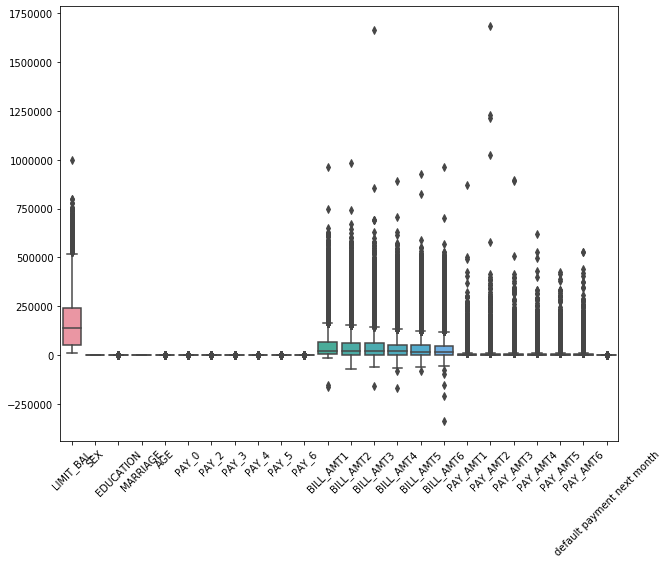

In [38]:
plotbox(df);

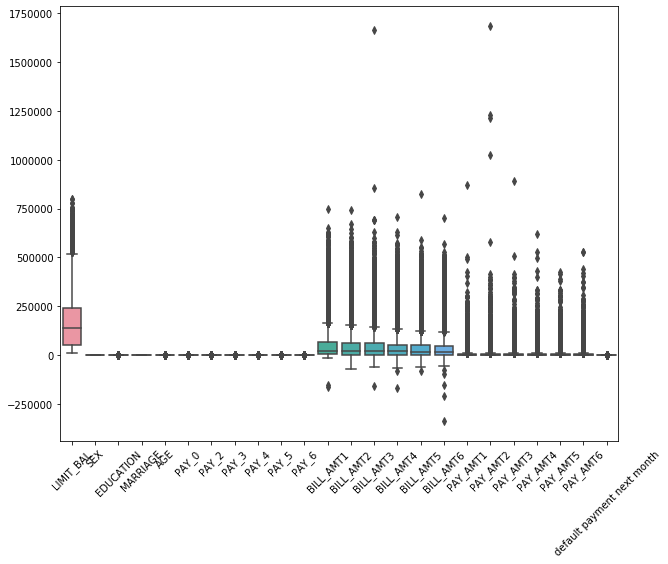

In [39]:
plotbox(df_filtered);

### Работа над признаками

In [40]:
y = df_filtered['default payment next month']
X_all = df_filtered.drop(columns='default payment next month')

In [41]:
# ф-ция процентного масштабирования величин
def perc_func(df):
    columns = list(df)
    ff = pd.DataFrame()
    for column in columns:
        rang = np.max(df[column]) - np.min(df[column])
        ff[column+'_perc'] = df[column].apply(lambda val:((val - np.min(df[column]))) / rang)
    return ff

In [107]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class PercentageScaler(BaseEstimator, TransformerMixin):
   
#     def __init__(self):
#         pass

#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         columns = list(X)
#         ff = pd.DataFrame()
#         for column in columns:
#             rang = np.max(X[column]) - np.min(X[column])
#             ff[column+'_perc'] = X[column].apply(lambda val:((val - np.min(X[column]))) / rang)
#         return ff.to_numpy()


In [128]:
from sklearn.base import BaseEstimator, TransformerMixin

class PercentageScaler(BaseEstimator, TransformerMixin):
   
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_arr = X.to_numpy()

        def perc(a):
            min_val = np.min(a)
            max_val = np.max(a)
            d = np.apply_along_axis(lambda x: (x - min_val)/(max_val - min_val),0,a)
            return d

        X_aperc = np.apply_along_axis(perc, 1, X_arr.T).T
        return X_aperc


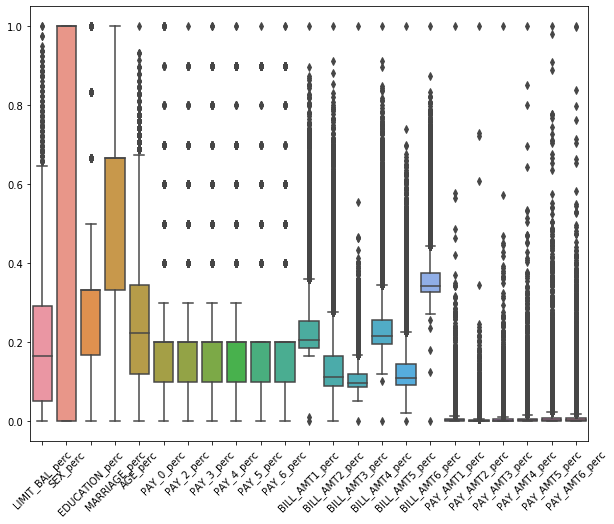

In [43]:
X_perc = perc_func(X_all)
plotbox(X_perc);

In [44]:
# ф-ция логорифмического масштабирования величин
def log_func(df):
    columns = list(df)
    ff = pd.DataFrame()
    for column in columns:
        min_val = np.min(df[column])
        ff[column+'_log'] = df[column].apply(lambda val: np.log10(val + 1 - min_val))
    return ff

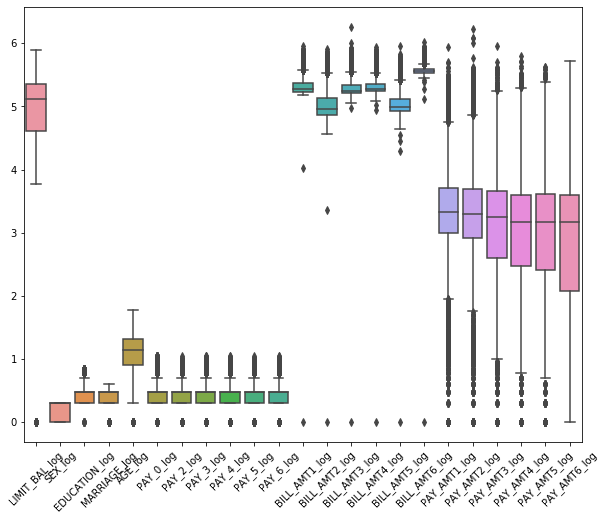

In [45]:
X_log = log_func(X_all)
plotbox(X_log);

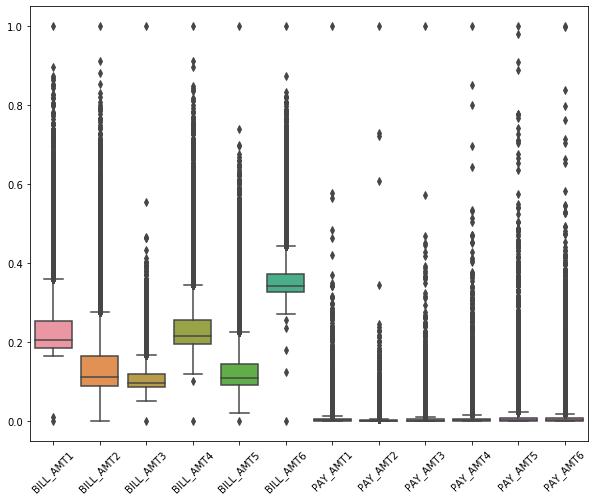

In [116]:
X_test = X_all[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
               'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
scl = PercentageScaler()
X_atest = pd.DataFrame(scl.fit_transform(X_test), columns=X_test.columns)
plotbox(X_atest);

In [118]:
X_atest.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000
mean,0.237557,0.146110,0.112133,0.243146,0.134369,0.364019,0.006481,0.003515,0.005844,0.007768,0.011247,0.009862
std,0.080418,0.087114,0.038000,0.073050,0.066838,0.056954,0.018959,0.013680,0.018941,0.025224,0.035815,0.033625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185378,0.089415,0.087807,0.196525,0.091833,0.327892,0.001145,0.000495,0.000439,0.000477,0.000593,0.000221
50%,0.206004,0.111796,0.097373,0.215598,0.109888,0.343102,0.002404,0.001193,0.002025,0.002415,0.003517,0.002837
75%,0.255007,0.164390,0.119374,0.256008,0.145335,0.373973,0.005731,0.002969,0.005066,0.006462,0.009451,0.007566
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
from sklearn.preprocessing import (StandardScaler, Normalizer, 
                                   RobustScaler, MinMaxScaler)

In [125]:
scl_col = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

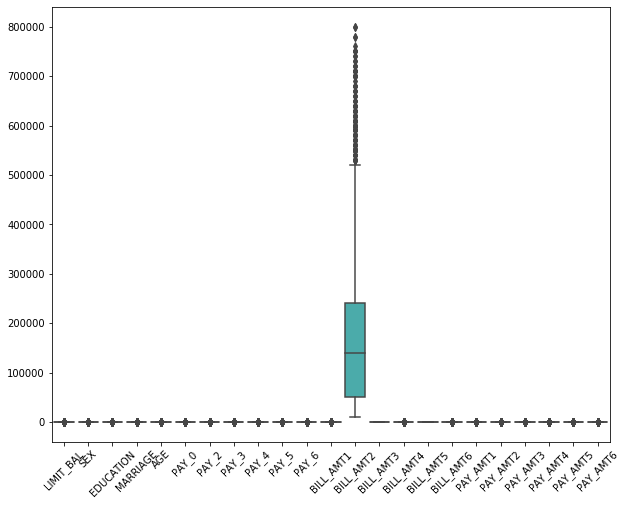

In [129]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("perc", PercentageScaler(), scl_col)], remainder='passthrough')
# ct = ColumnTransformer([("norm1", Normalizer(norm='l1'), X_all.columns)], remainder='passthrough')
# ct = ColumnTransformer([("standart", StandardScaler(), scl_col)], remainder='passthrough')
# ct = ColumnTransformer([("robust", RobustScaler(), scl_col)], remainder='passthrough')
# ct = ColumnTransformer([("MinMax", MinMaxScaler(), X_all.columns)], remainder='passthrough')

X_norm = ct.fit_transform(X_all)
X_norm = pd.DataFrame(X_norm, columns=X_all.columns)
plotbox(X_norm);

In [132]:
X_norm[scl_col].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000
mean,0.009862,167431.399140,1.603727,1.853152,1.551889,35.483915,-0.017035,-0.134080,-0.166517,-0.220922,-0.266493,-0.291429
std,0.033625,129628.108738,0.489131,0.790330,0.521970,9.216292,1.122844,1.196473,1.196258,1.168652,1.132707,1.149313
min,0.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,0.000221,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.002837,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.007566,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [75]:
ct

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('perc', PercentageScaler(),
                                 ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
                                  'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
                                  'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                                  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                  'PAY_AMT5', 'PAY_AMT6'])],
                  verbose=False)

__балансировка данных__

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.3, random_state=42)

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='minority', random_state=7)

X_to_train, y_to_train = sm.fit_sample(X_train, y_train)

X_to_train = pd.DataFrame(X_to_train, columns=X_train.columns)

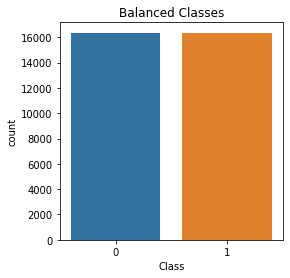

In [52]:
smote_df = X_to_train.copy()
smote_df['Class'] = y_to_train

plt.figure(figsize=(4, 4))
sns.countplot('Class', data = smote_df)
plt.title('Balanced Classes')
plt.show()

__тренировка на подготовленных данных__

In [53]:
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth=10, objective='binary:logistic', num_round=100, seed=1)
clf.fit(X_to_train, y_to_train)
y_pred = clf.predict(X_test)

__тюнинг модели__

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
params = {
    'eta': np.linspace(0,1,11),
    'min_child_weight': np.linspace(1,10,51),
    'alpha': np.linspace(0,2,21),
    'max_depth': np.arange(1,11,1),  
}

In [56]:
rcv = RandomizedSearchCV(estimator=clf,
                        param_distributions=params,
                        cv=3,
                        n_iter=1,
                        n_jobs=-2,
                        random_state=1,
                        scoring="roc_auc")

In [57]:
rcv.fit(X_to_train, y_to_train);

In [58]:
model = rcv.best_estimator_
model

XGBClassifier(alpha=1.7000000000000002, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              eta=0.6000000000000001, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=3, min_child_weight=2.26,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              num_round=100, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1,
              silent=None, subsample=1, verbosity=1)

In [59]:
y_pred = model.predict(X_test)

__Feature importance__

In [60]:
columns = X_test.columns
fi = pd.DataFrame(clf.feature_importances_, index=columns)\
.sort_values(by=0, ascending=False).reset_index()

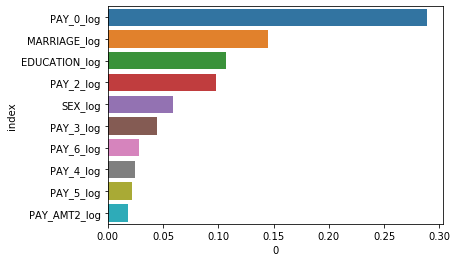

In [61]:
sns.barplot(x=0, y='index', data=fi.iloc[:10]);

In [62]:
metrics_clf(y_test, y_pred)

accuracy = 0.81
precision = 0.62
recall = 0.43
f1 = 0.51
roc auc = 0.68


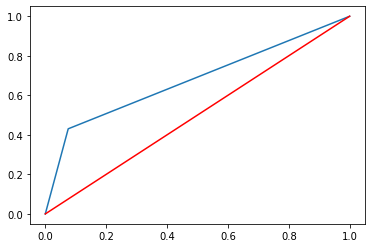

In [63]:
# calculate roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# make a plot
plt.plot(fpr, tpr);
plt.plot(np.linspace(0,1), np.linspace(0,1), color='red');

__результаты неподготовленных данных__
- accuracy = 0.72
- precision = 0.38
- recall = 0.42
- f1 = 0.40
- roc auc = 0.61

__результаты процентного масштабирования__
- accuracy = 0.80
- precision = 0.54
- recall = 0.49
- f1 = 0.51
- roc auc = 0.69

__результаты MinMax масштабирования__
- accuracy = 0.80
- precision = 0.56
- recall = 0.48
- f1 = 0.52
- roc auc = 0.69

__результаты Normalize масштабирования__
- accuracy = 0.78
- precision = 0.51
- recall = 0.55
- f1 = 0.53
- roc auc = 0.70

__результаты логарифмического масштабирования__
- accuracy = 0.81
- precision = 0.61
- recall = 0.42
- f1 = 0.50
- roc auc = 0.67